# Ridge regression with polynomial features of degree 2


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
import pickle
import os
import scipy.stats as st

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:5: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.


In [2]:
model_name = "ridge_poly2"
aml_dir = './data/'
train = pd.read_csv(os.path.join(aml_dir, 'nyc_demand_train.csv'), parse_dates=['timeStamp'])

Create model pipeline:
- one-hot encode categorical features.
- create polynomial features of degree 2. This means that for each pair of features $(x_1, x_2)$, the output features are $(x_1, x_2, x_1^2, x_1x_2, x_2^2)$
- randomized parameter search with cross validation to find optimal values for the alpha parameter

Note - to limit the training time, the number of iterations for the randomized search has been set to 20. This should train in about 3 minutes. increasing the number of iterations will increase the likelihood of finding the optimum solution but also increase training times. 

In [3]:
X = train.drop(['demand', 'timeStamp'], axis=1)

In [4]:
cat_cols = ['hour', 'month', 'dayofweek']
cat_cols_idx = [X.columns.get_loc(c) for c in X.columns if c in cat_cols]
onehot = OneHotEncoder(categorical_features=cat_cols_idx, sparse=False)
regr = Ridge(fit_intercept=False)
poly = PolynomialFeatures(2)
tscv = TimeSeriesSplit(n_splits=3)

In [5]:
param_dist = {'alpha': st.uniform(1e-4, 5.0)}
regr_cv = RandomizedSearchCV(estimator=regr,
                            param_distributions=param_dist,
                            n_iter=20,
                            scoring='neg_mean_squared_error',
                            iid=False,
                            cv=tscv,
                            verbose=2,
                            n_jobs=1)
regr_pipe = Pipeline([('onehot', onehot), ('poly', poly), ('regr_cv', regr_cv)])
regr_pipe.fit(X, y=train['demand'])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] alpha=2.7760176790054576 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.619367e-21
  overwrite_a=True).T
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s remaining:    0.0s


[CV] ......................... alpha=2.7760176790054576, total=  29.4s
[CV] alpha=2.7760176790054576 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.560489e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.7760176790054576, total=  33.7s
[CV] alpha=2.7760176790054576 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.166101e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.7760176790054576, total= 1.1min
[CV] alpha=4.7612405132460545 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.015097e-21
  overwrite_a=True).T


[CV] ......................... alpha=4.7612405132460545, total=  16.1s
[CV] alpha=4.7612405132460545 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.365657e-21
  overwrite_a=True).T


[CV] ......................... alpha=4.7612405132460545, total=   8.8s
[CV] alpha=4.7612405132460545 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.262717e-22
  overwrite_a=True).T


[CV] ......................... alpha=4.7612405132460545, total=  40.2s
[CV] alpha=2.9866481954207247 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.759894e-21
  overwrite_a=True).T


[CV] ......................... alpha=2.9866481954207247, total=   7.1s
[CV] alpha=2.9866481954207247 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.180976e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.9866481954207247, total=  14.8s
[CV] alpha=2.9866481954207247 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.592079e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.9866481954207247, total= 1.1min
[CV] alpha=2.139040916898977 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.207830e-21
  overwrite_a=True).T


[CV] .......................... alpha=2.139040916898977, total=   8.9s
[CV] alpha=2.139040916898977 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.712724e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.139040916898977, total=  13.2s
[CV] alpha=2.139040916898977 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.899846e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.139040916898977, total=  34.0s
[CV] alpha=1.3050500265371257 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.033478e-22
  overwrite_a=True).T


[CV] ......................... alpha=1.3050500265371257, total=   6.4s
[CV] alpha=1.3050500265371257 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.362386e-22
  overwrite_a=True).T


[CV] ......................... alpha=1.3050500265371257, total=  13.0s
[CV] alpha=1.3050500265371257 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.290447e-22
  overwrite_a=True).T


[CV] ......................... alpha=1.3050500265371257, total=  20.2s
[CV] alpha=3.054970746732062 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.805890e-21
  overwrite_a=True).T


[CV] .......................... alpha=3.054970746732062, total=   5.4s
[CV] alpha=3.054970746732062 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.383788e-22
  overwrite_a=True).T


[CV] .......................... alpha=3.054970746732062, total=   9.2s
[CV] alpha=3.054970746732062 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.730957e-22
  overwrite_a=True).T


[CV] .......................... alpha=3.054970746732062, total=  17.0s
[CV] alpha=2.1392363363086804 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.207953e-21
  overwrite_a=True).T


[CV] ......................... alpha=2.1392363363086804, total=   7.1s
[CV] alpha=2.1392363363086804 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.713286e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.1392363363086804, total=  12.8s
[CV] alpha=2.1392363363086804 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.900228e-22
  overwrite_a=True).T


[CV] ......................... alpha=2.1392363363086804, total= 1.5min
[CV] alpha=0.03426772334035867 .......................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.545093e-23
  overwrite_a=True).T


[CV] ........................ alpha=0.03426772334035867, total=  10.1s
[CV] alpha=0.03426772334035867 .......................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.637981e-24
  overwrite_a=True).T


[CV] ........................ alpha=0.03426772334035867, total=  19.3s
[CV] alpha=0.03426772334035867 .......................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.304264e-24
  overwrite_a=True).T


[CV] ........................ alpha=0.03426772334035867, total=  30.1s
[CV] alpha=0.9574985905391896 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.048370e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9574985905391896, total=   5.4s
[CV] alpha=0.9574985905391896 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.414833e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9574985905391896, total=  10.6s
[CV] alpha=0.9574985905391896 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.648743e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9574985905391896, total=  13.6s
[CV] alpha=3.7496345847160213 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.283861e-21
  overwrite_a=True).T


[CV] ......................... alpha=3.7496345847160213, total=   5.2s
[CV] alpha=3.7496345847160213 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.048576e-21
  overwrite_a=True).T


[CV] ......................... alpha=3.7496345847160213, total=  10.3s
[CV] alpha=3.7496345847160213 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.144784e-22
  overwrite_a=True).T


[CV] ......................... alpha=3.7496345847160213, total=  13.4s
[CV] alpha=4.17552220810957 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.586390e-21
  overwrite_a=True).T


[CV] ........................... alpha=4.17552220810957, total=   5.4s
[CV] alpha=4.17552220810957 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.180622e-21
  overwrite_a=True).T


[CV] ........................... alpha=4.17552220810957, total=   8.6s
[CV] alpha=4.17552220810957 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.028082e-22
  overwrite_a=True).T


[CV] ........................... alpha=4.17552220810957, total=  13.9s
[CV] alpha=3.2331180765848524 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.926751e-21
  overwrite_a=True).T


[CV] ......................... alpha=3.2331180765848524, total=   4.8s
[CV] alpha=3.2331180765848524 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.916685e-22
  overwrite_a=True).T


[CV] ......................... alpha=3.2331180765848524, total=   9.9s
[CV] alpha=3.2331180765848524 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.092436e-22
  overwrite_a=True).T


[CV] ......................... alpha=3.2331180765848524, total=  12.9s
[CV] alpha=2.893668893540443 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.697638e-21
  overwrite_a=True).T


[CV] .......................... alpha=2.893668893540443, total=   4.5s
[CV] alpha=2.893668893540443 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.906223e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.893668893540443, total=  10.5s
[CV] alpha=2.893668893540443 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.403760e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.893668893540443, total=  14.6s
[CV] alpha=3.725508721339082 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.266997e-21
  overwrite_a=True).T


[CV] .......................... alpha=3.725508721339082, total=   4.5s
[CV] alpha=3.725508721339082 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.041180e-21
  overwrite_a=True).T


[CV] .......................... alpha=3.725508721339082, total=  10.0s
[CV] alpha=3.725508721339082 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.095263e-22
  overwrite_a=True).T


[CV] .......................... alpha=3.725508721339082, total=  12.9s
[CV] alpha=2.105323835705572 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.186623e-21
  overwrite_a=True).T


[CV] .......................... alpha=2.105323835705572, total=   5.4s
[CV] alpha=2.105323835705572 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.616012e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.105323835705572, total=   6.1s
[CV] alpha=2.105323835705572 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.833626e-22
  overwrite_a=True).T


[CV] .......................... alpha=2.105323835705572, total=   8.5s
[CV] alpha=1.303707200272006 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number7.025691e-22
  overwrite_a=True).T


[CV] .......................... alpha=1.303707200272006, total=   3.3s
[CV] alpha=1.303707200272006 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.358663e-22
  overwrite_a=True).T


[CV] .......................... alpha=1.303707200272006, total=   6.1s
[CV] alpha=1.303707200272006 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.287943e-22
  overwrite_a=True).T


[CV] .......................... alpha=1.303707200272006, total=   9.7s
[CV] alpha=0.8504931510309715 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.451480e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.8504931510309715, total=   3.2s
[CV] alpha=0.8504931510309715 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.130191e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.8504931510309715, total=   4.6s
[CV] alpha=0.8504931510309715 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.452017e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.8504931510309715, total=   4.4s
[CV] alpha=4.514220892092216 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.832521e-21
  overwrite_a=True).T


[CV] .......................... alpha=4.514220892092216, total=   1.8s
[CV] alpha=4.514220892092216 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.287193e-21
  overwrite_a=True).T


[CV] .......................... alpha=4.514220892092216, total=   2.8s
[CV] alpha=4.514220892092216 .........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.742087e-22
  overwrite_a=True).T


[CV] .......................... alpha=4.514220892092216, total=   4.6s
[CV] alpha=4.54424052685573 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.854562e-21
  overwrite_a=True).T


[CV] ........................... alpha=4.54424052685573, total=   1.8s
[CV] alpha=4.54424052685573 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.296688e-21
  overwrite_a=True).T


[CV] ........................... alpha=4.54424052685573, total=   3.2s
[CV] alpha=4.54424052685573 ..........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.805138e-22
  overwrite_a=True).T


[CV] ........................... alpha=4.54424052685573, total=   4.3s
[CV] alpha=0.9134776817031552 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.802445e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9134776817031552, total=   1.6s
[CV] alpha=0.9134776817031552 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.297363e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9134776817031552, total=   3.1s
[CV] alpha=0.9134776817031552 ........................................


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.567443e-22
  overwrite_a=True).T


[CV] ......................... alpha=0.9134776817031552, total=   4.0s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 14.6min finished
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.206808e-22
  overwrite_a=True).T


Pipeline(memory=None,
     steps=[('onehot', OneHotEncoder(categorical_features=[2, 3, 4], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('regr_cv', RandomizedSearchCV(cv=TimeSeriesSplit(max_trai...=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2))])

In [6]:
with open(os.path.join(aml_dir, model_name + '.pkl'), 'wb') as f:
    pickle.dump(regr_pipe, f)

Cross validation results

In [7]:
cv_results = pd.DataFrame(regr_pipe.named_steps['regr_cv'].cv_results_)
cv_results.sort_values(by='rank_test_score').head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
8,9.741263,0.127668,-1247.798726,-1044.993847,0.957499,{'alpha': 0.9574985905391896},1,-1373.636747,-1013.167732,-1078.430181,-1077.453905,-1291.329250,-1044.359904,3.354606,0.019741,124.386250,26.248548
19,2.848261,0.047975,-1247.815067,-1044.614788,0.913478,{'alpha': 0.9134776817031552},2,-1373.634242,-1012.512303,-1078.411045,-1077.166942,-1291.399915,-1044.165118,1.045081,0.023282,124.402340,26.397061
16,4.030509,0.043626,-1247.860393,-1044.064552,0.850493,{'alpha': 0.8504931510309715},3,-1373.680961,-1011.565080,-1078.387371,-1076.747308,-1291.512847,-1043.881267,0.599336,0.007651,124.442031,26.610849
15,6.261892,0.081291,-1248.035728,-1047.861290,1.30371,{'alpha': 1.303707200272006},4,-1374.502817,-1018.192520,-1078.640996,-1079.581859,-1290.963371,-1045.809491,2.604369,0.029626,124.540866,25.104052
4,13.089921,0.115392,-1248.037737,-1047.872116,1.30505,{'alpha': 1.3050500265371257},5,-1374.508691,-1018.211683,-1078.642011,-1079.589785,-1290.962508,-1045.814881,5.635385,0.015787,124.542295,25.099694


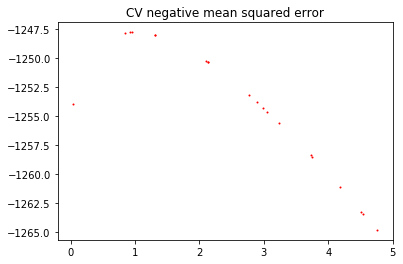

In [8]:
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], 'ro', markersize=1)
plt.title('CV negative mean squared error')
plt.show()